## **Data Description**

### **` Age`**: age of primary beneficiary.

### **` Sex`**: insurance contractor gender, female, male.

### **` BMI`**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to                     height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9.

### **` Children`**: Number of children covered by health insurance/Number of dependents.

### **` Smoker`**: Is the person a smoker or not.

### **`Region`**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

### **` Charges`**: Individual medical costs billed by health insurance.
###  **`Dataset source`**: https://www.kaggle.com/code/nabilabdul/medical-insurance-cost-prediction-91-19

## **Importing Relevant libraries**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

## **Data Cleaning**

In [23]:
df = pd.read_csv("insurance.csv")

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
df.shape

(1338, 7)

In [27]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

## **Mapping**

In [28]:
df['Sex'] = df['sex'].map({'male':1,
              'female':0})


In [29]:
df.drop(['sex'],axis=1,
       inplace=True)

In [30]:
df.head()

,age,bmi,children,smoker,region,charges,Sex
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


In [31]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [32]:
df['Region'] = df['region'].map({ 'southwest':0,
                                 'southeast':1,
                                 'northwest':2,
                                 'northeast':3
    
})

In [33]:
df.head()

,age,bmi,children,smoker,region,charges,Sex,Region
0,19,27.900,0,yes,southwest,16884.92400,0,0
1,18,33.770,1,no,southeast,1725.55230,1,1
2,28,33.000,3,no,southeast,4449.46200,1,1
3,33,22.705,0,no,northwest,21984.47061,1,2
4,32,28.880,0,no,northwest,3866.85520,1,2


In [34]:
df['Smoker'] = df['smoker'].map({
    'yes':1,
    'no':0
})

In [35]:
df.head()

,age,bmi,children,smoker,region,charges,Sex,Region,Smoker
0,19,27.900,0,yes,southwest,16884.92400,0,0,1
1,18,33.770,1,no,southeast,1725.55230,1,1,0
2,28,33.000,3,no,southeast,4449.46200,1,1,0
3,33,22.705,0,no,northwest,21984.47061,1,2,0
4,32,28.880,0,no,northwest,3866.85520,1,2,0


In [36]:
df.drop(['smoker'],axis=1,inplace=True)


In [37]:
df_smk_n_reg_dropped = df.drop(['region'],axis=1)
df_smk_n_reg_dropped.head()

,age,bmi,children,charges,Sex,Region,Smoker
0,19,27.900,0,16884.92400,0,0,1
1,18,33.770,1,1725.55230,1,1,0
2,28,33.000,3,4449.46200,1,1,0
3,33,22.705,0,21984.47061,1,2,0
4,32,28.880,0,3866.85520,1,2,0


In [56]:
df_smk_n_reg_dropped.columns.values

array(['age', 'bmi', 'children', 'charges', 'Sex', 'Region', 'Smoker'],
      dtype=object)

In [58]:
columns_ = ['age','Sex', 'bmi', 'children','Smoker', 'Region','charges']
       
df_new_preprocessed  = pd.DataFrame(df_smk_n_reg_dropped,columns=columns_)

In [59]:
df_new_preprocessed.head()

,age,Sex,bmi,children,Smoker,Region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [60]:
# checkpoint
df_preprocessed = df_new_preprocessed.copy()

In [61]:
df_preprocessed.head()

,age,Sex,bmi,children,Smoker,Region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [62]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   Sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   Smoker    1338 non-null   int64  
 5   Region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


### **Label Encoding**
**`Male`** : **1**
**`Female`**: **0**
**`Smoker`**:**1**
**`Non Smoker`**: **0**
**`southwest`**:**0**
**`southeast`**:**1**
**`northwest`**:**2**
**`northeast`**:**3**

## **Data Exploration**

In [63]:
# dtype conversion
df_preprocessed["Sex"] = df_preprocessed["Sex"].astype(np.int8)
df_preprocessed['Smoker']=df_preprocessed['Smoker'].astype(np.int8)
df_preprocessed.info()
# catogorical data
categorical_features = list(df_preprocessed.select_dtypes("int8").columns)
# categorical_features
df_preprocessed['children']=df_preprocessed['children'].astype(np.float64)
numeric_features = list(df_preprocessed.select_dtypes('float64').columns)
# numeric_features
numeric_features.remove('charges')
target = 'charges'
print(f'numeric_features:\n{numeric_features}\n\ncategorical_features:\n{categorical_features}\n\ntarget:\n{target}')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   Sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   Smoker    1338 non-null   int8   
 5   Region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), int8(2)
memory usage: 55.0 KB
numeric_features:
['bmi', 'children']

categorical_features:
['Sex', 'Smoker']

target:
charges


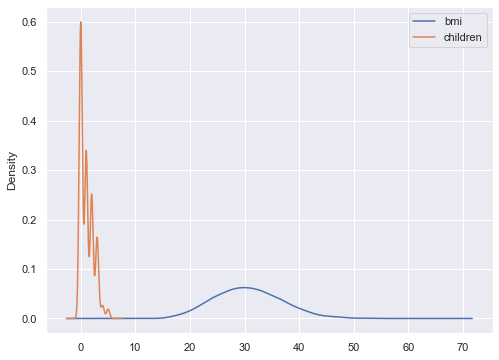

In [64]:
cols = []
for index,columns in enumerate(numeric_features):
        cols.append(columns)

new_cols = df_preprocessed[cols]
new_cols.iloc[:,:2].plot(kind='kde',figsize=(8,6),
                        );



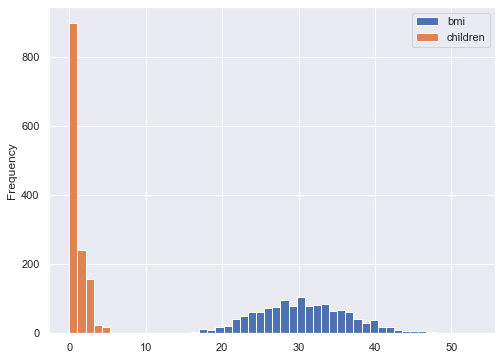

In [65]:
new_cols.iloc[:,:2].plot(kind='hist',
                         figsize=(8,6),
                        bins=50);


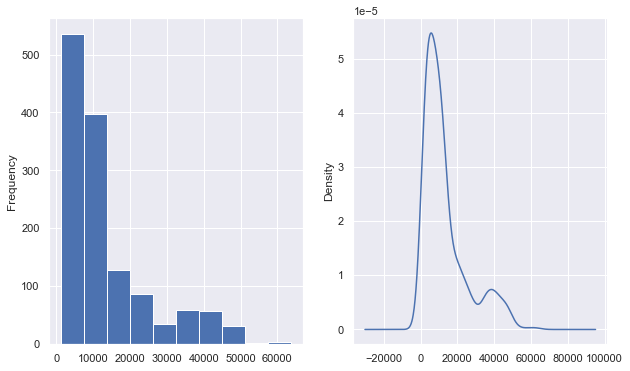

In [66]:
# checking probality distribution of charges(target)
fig,(ax0,ax1) = plt.subplots(1,2,
                            figsize=(10,6))
df_preprocessed['charges'].plot(kind='kde',ax=ax1)
df_preprocessed['charges'].plot(kind='hist',ax=ax0);

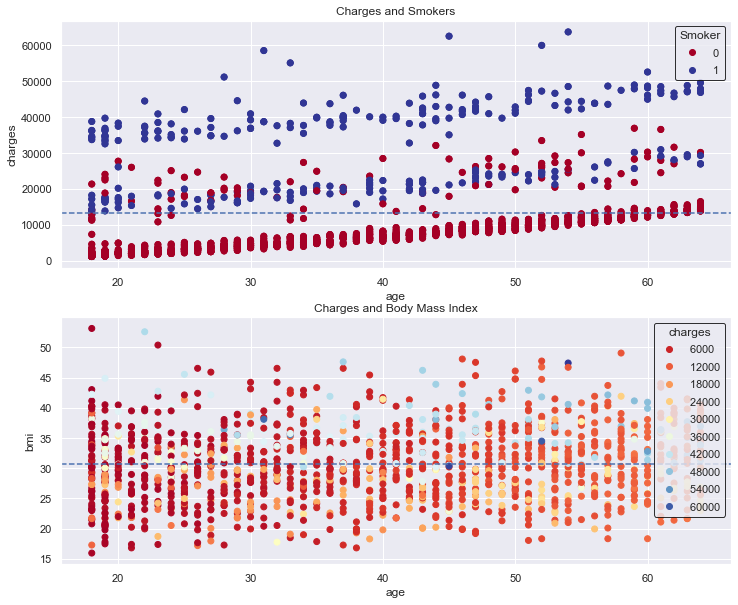

In [67]:
fig , (ax1,ax2) = plt.subplots(2,figsize=(12,10))
#plot the data (smoker)
scatter = ax1.scatter(x=df_preprocessed['age'],
                     y=df_preprocessed['charges'],
                     c=df_preprocessed['Smoker'],
                     cmap='RdYlBu')
#customize the data
ax1.set(xlabel='age',
       ylabel='charges',
       title='Charges and Smokers')
# adding legend
ax1.legend(*scatter.legend_elements(),title='Smoker',
         loc="best", edgecolor="black")
# adding a horizontal line
ax1.axhline(df_preprocessed['charges'].mean(),
           linestyle='--');

scatter = ax1.scatter(x=df_preprocessed['age'],
                     y=df_preprocessed['charges'],
                     c=df_preprocessed['Smoker'],
                     cmap='RdYlBu')

# plot the data
scatter = ax2.scatter(x=df_preprocessed['age'],
                     y=df_preprocessed['bmi'],
                     c=df_preprocessed['charges'],
                     cmap='RdYlBu');
#customize the data
ax2.set(xlabel='age',
       ylabel='bmi',
       title='Charges and Body Mass Index')
# adding legend
ax2.legend(*scatter.legend_elements(),title='charges',
         loc="best", edgecolor="black")
# adding a horizontal line
ax2.axhline(df_preprocessed['bmi'].mean(),
           linestyle='--');




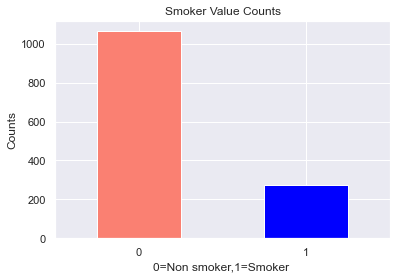

In [68]:
df_preprocessed['Smoker'].value_counts().plot.bar(color=['salmon','blue']
                                                 )
plt.xlabel('0=Non smoker,1=Smoker ')
plt.ylabel('Counts')
plt.title('Smoker Value Counts')
plt.xticks(rotation=0);

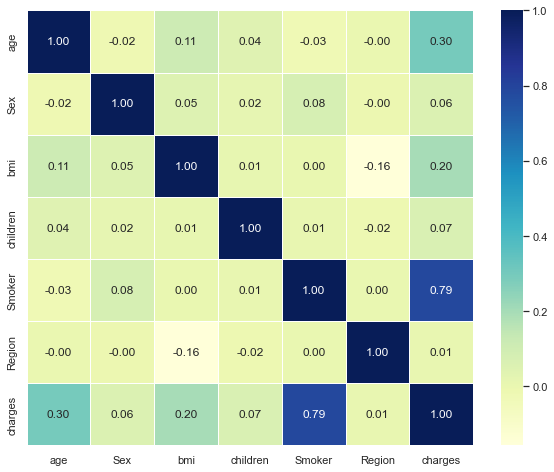

In [69]:
# creating heatmap of correlation matrix
corr_matrix = df_preprocessed.corr()
fig , ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu',
                 )

## **Outliers**

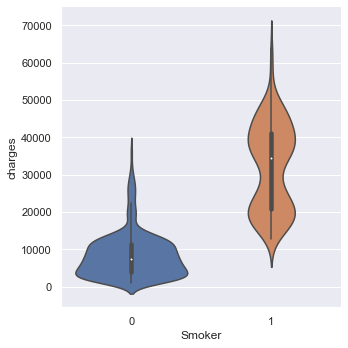

In [70]:
# Categorical distribution plots:
# checking for outliers
sns.catplot(x='Smoker',
           y= 'charges',
            kind="violin",
           data = df_preprocessed);

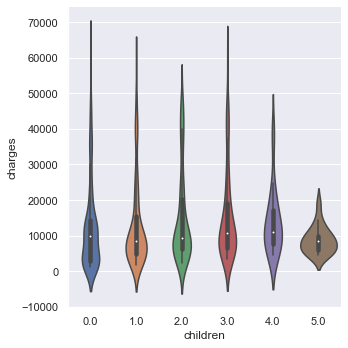

In [71]:
sns.catplot(x='children',
           y= 'charges',
            kind="violin",
           data = df_preprocessed);

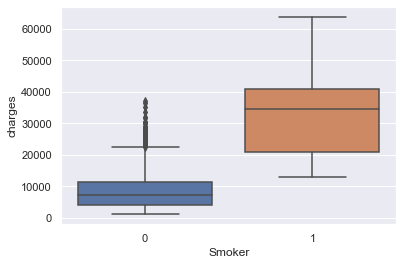

In [72]:
#  relationship between a numeric and categorical feature
sns.boxplot(x=df_preprocessed[categorical_features[1]],y=df_preprocessed[target]);

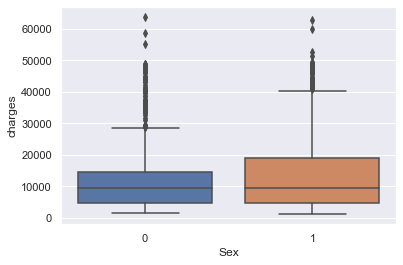

In [73]:
sns.boxplot(x=df_preprocessed[categorical_features[0]],y=df_preprocessed[target]);

### Saving the Processed data

In [74]:

df_preprocessed.to_csv('Data Cleaned Insurance.csv',index=False)